### Import all the libraries that will be used

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

### Load the dataset

In [128]:
data= pd.read_csv('Telco_Churn.csv')

### View the top 2 rows of data

In [129]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### Drop the 'customerID' column

In [130]:
data= data.drop('customerID',axis=1)

In [105]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### Label Encode the 'Churn' column 

In [131]:
data['Churn']= data['Churn'].map({'Yes':1, 'No':0})

In [132]:
data.shape

(7043, 20)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Convert 'TotalCharges' column from object to numeric

In [134]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

### One-hot encode the categorical columns

In [ ]:
categorical_features= data.select_dtypes(include= ['object'])

In [135]:
df= pd.get_dummies(data, columns=categorical_features.columns.tolist())

In [136]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


## 1. Finding Correlation of features with the target variable 'Churn'

In [137]:
corr_among_variables= df.corr()

In [138]:
corr_among_variables['Churn'].sort_values(ascending= False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

### Heatmap to visualize the correlations

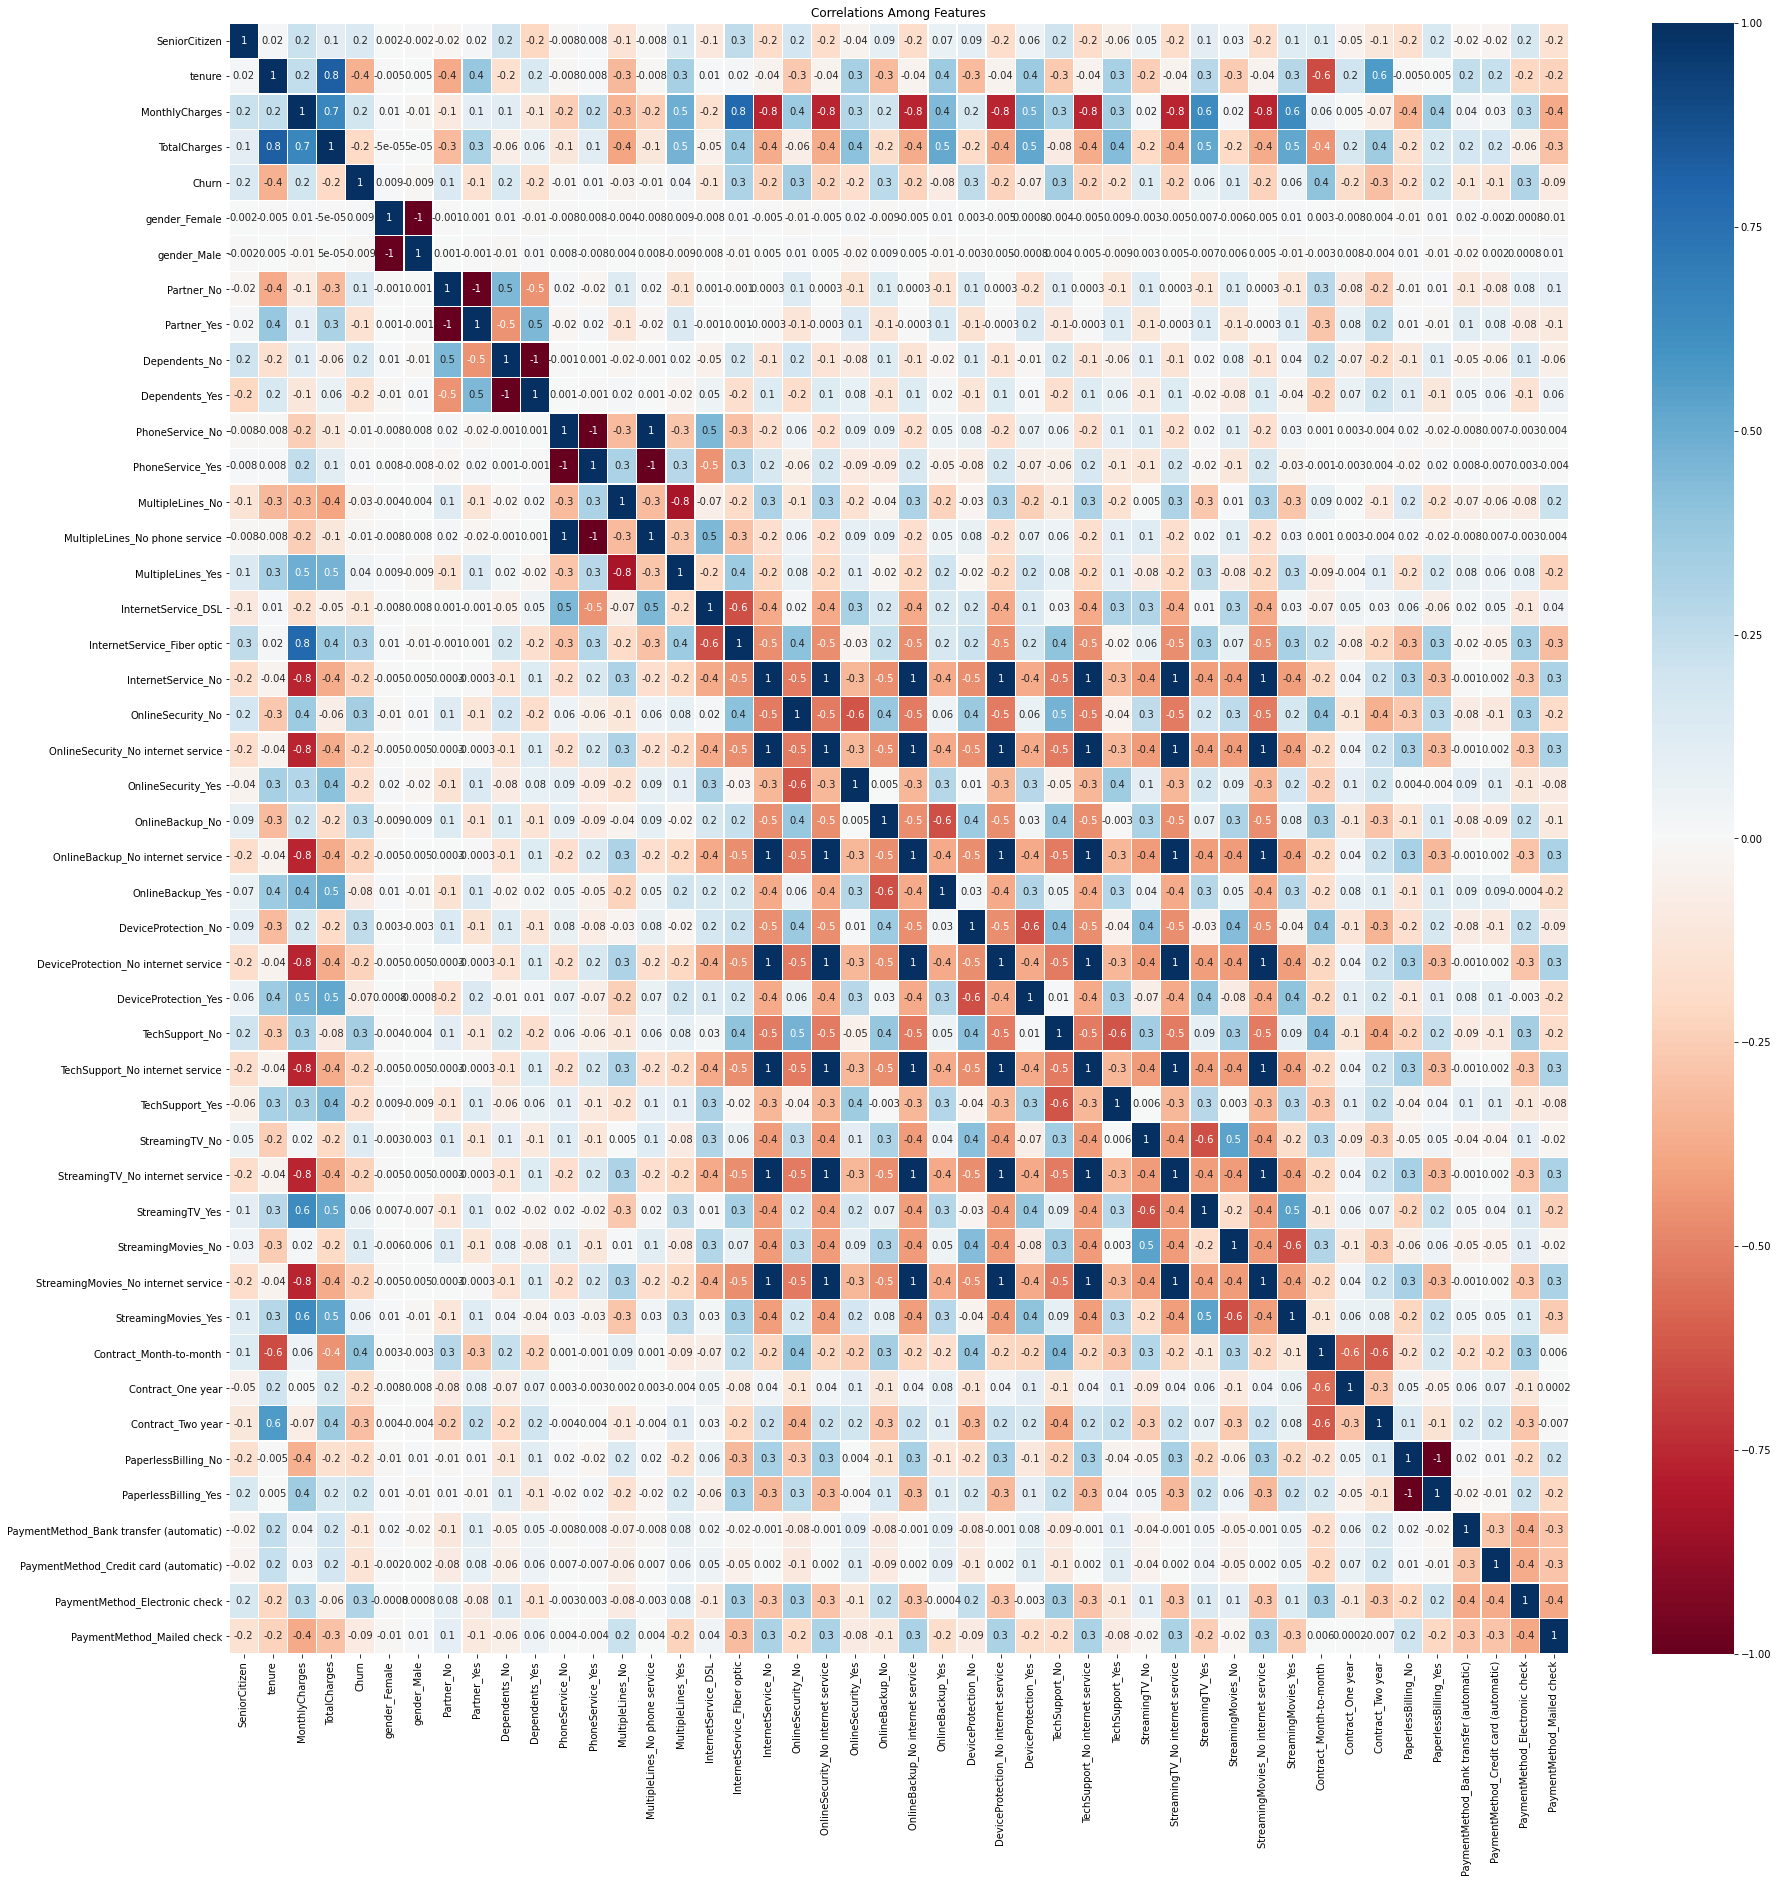

In [180]:
plt.figure(figsize=(30,30)) 
sns.heatmap(df.corr(),annot=True, cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=0.3, 
            linecolor='white',
            fmt='.0001g',
            center = 0,
            square=False)

plt.title("Correlations Among Features");

## 2. Decision Trees

In [149]:
df= df.dropna(axis=0, how= 'any')

In [152]:
X= df.drop('Churn', axis=1)
Y= df['Churn']
classifier = DecisionTreeClassifier()
classifier.fit(X, Y)

DecisionTreeClassifier()

In [159]:
cols= X.columns.tolist()
relevant_features = classifier.feature_importances_
relevant_features= pd.DataFrame(relevant_features*100)
relevant_features.index= cols
relevant_features.columns= ['Importance']
relevant_features= relevant_features.sort_values('Importance', ascending= False)

<AxesSubplot:>

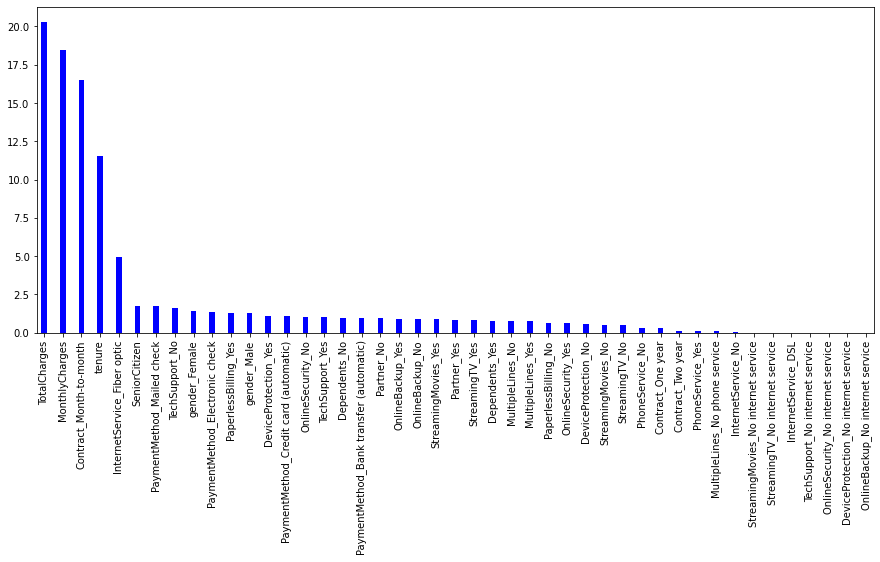

In [166]:
plt.figure(figsize=(15,6)) 
relevant_features['Importance'].plot.bar( rot=90, color="blue", width=0.3)

## 3. XGBoost

In [178]:
clf_xgb= xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X,Y)
cols= X.columns.tolist()
relevant_features = clf_xgb.feature_importances_
relevant_features= pd.DataFrame(relevant_features*100)
relevant_features.index= cols
relevant_features.columns= ['Importance']
relevant_features= relevant_features.sort_values('Importance', ascending= False)

C:\Users\ae954301\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:38:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

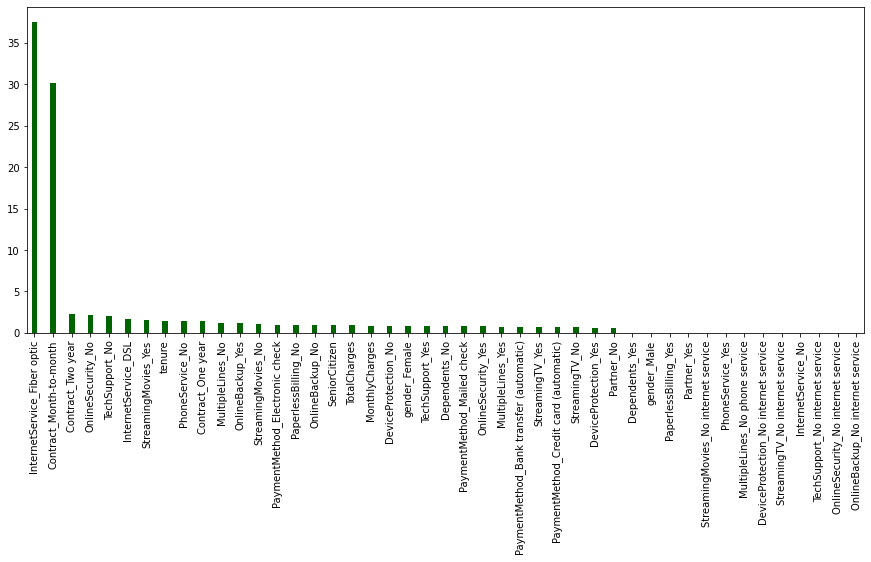

In [177]:
plt.figure(figsize=(15,6)) 
relevant_features['Importance'].plot.bar( rot=90, color="darkgreen", width=0.3)

## 4. Step Forward Feature Selection

In [200]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=5,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [203]:
features = feature_selector.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   50.5s finished

[2021-02-28 11:26:21] Features: 1/5 -- score: 0.7302322777498813[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   50.4s finished

[2021-02-28 11:27:11] Features: 2/5 -- score: 0.8057359269322274[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   48.2s finished

[2021-02-28 11:28:00] Features: 3/5 -- score: 0.8167265259224007[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [204]:
best_features= X.columns[list(features.k_feature_idx_)]
best_features

Index(['tenure', 'InternetService_DSL', 'InternetService_Fiber optic',
       'StreamingTV_No internet service', 'Contract_Two year'],
      dtype='object')

## 5. Step Backwards Feature Selection

In [205]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=5,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [206]:
features = feature_selector.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.5min finished

[2021-02-28 11:45:36] Features: 44/5 -- score: 0.8206802236993938[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  1.3min finished

[2021-02-28 11:46:56] Features: 43/5 -- score: 0.8204021751472312[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  1.3min finished

[2021-02-28 11:48:17] Features: 42/5 -- score: 0.8210582730714916[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [207]:
best_features= X.columns[list(features.k_feature_idx_)]
best_features

Index(['MonthlyCharges', 'TotalCharges', 'Partner_No',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check'],
      dtype='object')